In [1]:
# using SFGTools
include("../src/sfspectrum.jl")
include("../src/maths.jl")
include("../src/spectraio.jl")
include("../src/processing.jl")

rm_background! (generic function with 2 methods)

In [2]:
grab()

Collected 76 spectra


In [3]:
df = list_spectra(inexact="au_mirror_dlscan")
sort!(df, cols=order(:id))

,id,name,number,date
1,63647670325179,Au_Mirror_DLScan,1,2017-11-29T20:25:25.179
2,63647670361363,Au_Mirror_DLScan,2,2017-11-29T20:26:01.363
3,63647670397528,Au_Mirror_DLScan,3,2017-11-29T20:26:37.528
4,63647670433678,Au_Mirror_DLScan,4,2017-11-29T20:27:13.678
5,63647670469863,Au_Mirror_DLScan,5,2017-11-29T20:27:49.863
6,63647670506028,Au_Mirror_DLScan,6,2017-11-29T20:28:26.028
7,63647670542178,Au_Mirror_DLScan,7,2017-11-29T20:29:02.178
8,63647670578328,Au_Mirror_DLScan,8,2017-11-29T20:29:38.328
9,63647670614528,Au_Mirror_DLScan,9,2017-11-29T20:30:14.528
10,63647670650678,Au_Mirror_DLScan,10,2017-11-29T20:30:50.678


In [31]:
id = df[:id]
idscan = id[1:25]
idtest = id[26]
idbg = id[27];

scan = load_spectra(idscan)
test = load_spectra(idtest)
bg = load_spectra(idbg)

println("Spectrum with id $(scan[15].id)\nSize of the data: $(size(scan[15].s))")

Spectrum with id 63647670831527
Size of the data: (512, 1, 30)


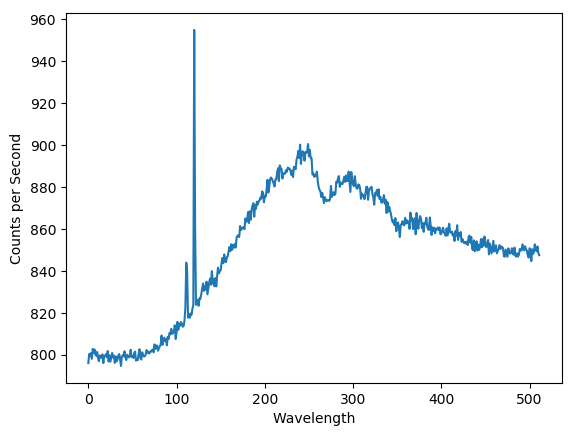

PyObject Text(24,0.5,'Counts per Second')

In [32]:
using PyPlot

plot(mean(scan[20]))
xlabel("Wavelength")
ylabel("Counts per Second")

7797
1333
7592
111
113
122
2123


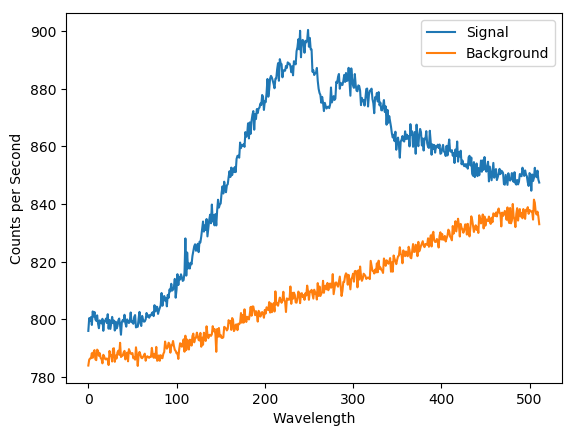

11966


PyObject Text(24,0.5,'Counts per Second')

In [34]:
rm_events!.(scan)
plot(mean(scan[20]), label="Signal")
plot(mean(bg), label="Background")
legend()
xlabel("Wavelength")
ylabel("Counts per Second")

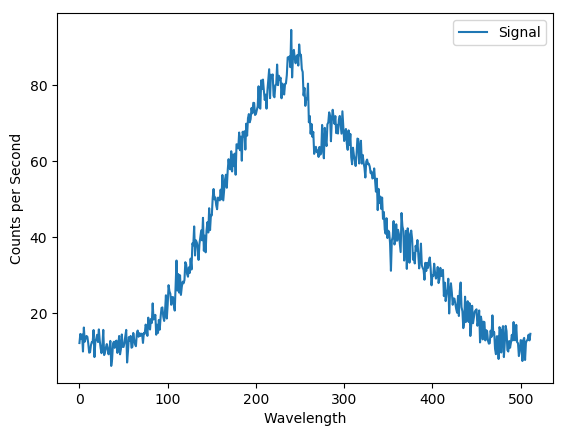

PyObject Text(24,0.5,'Counts per Second')

In [35]:
rm_background!(scan, bg)
plot(scan[20].s, label="Signal")
legend()
xlabel("Wavelength")
ylabel("Counts per Second")

In [37]:
read_metadata(scan[1])

Dict{String,Any} with 18 entries:
  "micos_position_y"        => 25792.9
  "micos_position_x"        => 4700.0
  "twin1_wavelength"        => "NA"
  "micos_position_z"        => 25489.3
  "x_binning"               => 1
  "ccd_readout_speed"       => 80000
  "pump_ir_wavelength"      => "NA"
  "ccd_temperature"         => -89
  "pump_dl_position"        => 73690
  "comment"                 => "Vis Power = 13 mW; IR Power = 10 mW; Lens green…
  "y_binning"               => 512
  "twin2_wavelength"        => "NA"
  "spectrometer_wavelength" => 445.5
  "ccd_exposure_time"       => 1.0
  "mirror_position"         => "ccd"
  "grating"                 => 2400
  "vis_dl_position"         => "NA"
  "timestamp"               => "2017-11-29T20:25:25.179"

In [38]:
get_attribute(scan[1], "comment")

"Vis Power = 13 mW; IR Power = 10 mW; Lens green = 300 mm; Lens red = 100 mm; Collecting lens = 40 mm; Spectrometer lens = 150 mm; polarizer green = 0 degree; polarizer red = ?; polarizer spectrometer = 45 degree; slit @1.0; Spectrum seems to be contaminated by fat"

In [41]:
dlpos = get_attribute(scan, "micos_position_x")

25-element Array{Any,1}:
 4700.0
 4750.0
 4800.0
 4850.1
 4899.9
 4950.0
 4999.9
 5050.0
 5099.9
 5150.1
 5200.1
 5250.0
 5300.0
 5350.0
 5400.0
 5450.0
 5499.9
 5550.0
 5600.0
 5649.9
 5700.0
 5750.1
 5799.9
 5850.1
 5899.9

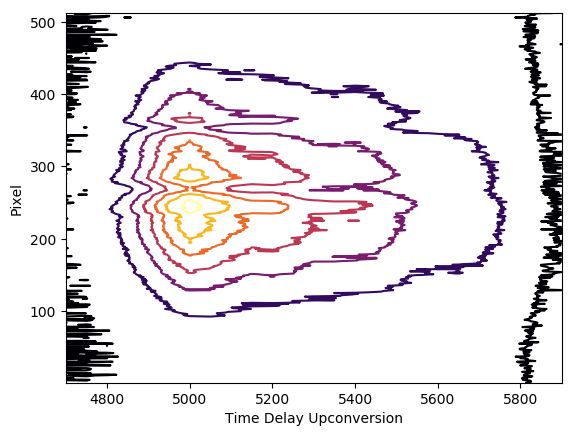

PyObject Text(24,0.5,'Pixel')

In [46]:
z = zeros(length(scan[1].s), length(scan))
for i = 1:length(scan)
    z[:,i] = scan[i].s
end
contour(dlpos, 1:512, z, cmap=ColorMap("inferno"))
xlabel("Time Delay Upconversion")
ylabel("Pixel")

In [80]:
using Loess
zz = similar(z)
for i = 1:size(z, 2)
    model = loess(collect(1.0:size(z, 1)), z[:,i], span=0.08, normalize=true)
    zz[:,i] = Loess.predict(model, collect(1.0:size(z, 1)))
end

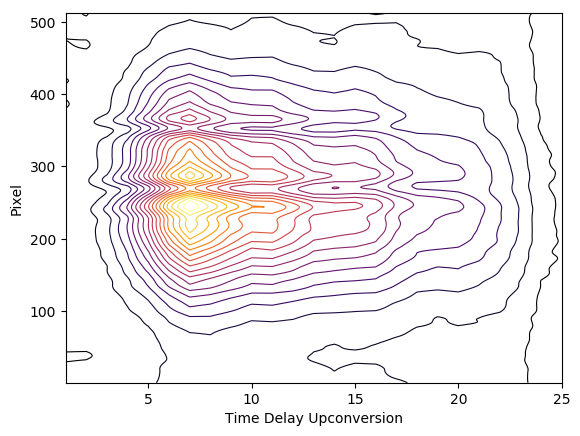

PyObject Text(24,0.5,'Pixel')

In [199]:
figure()
contour(1:25, 1:512, zz, cmap=ColorMap("inferno"), 
        levels=linspace(0, maximum(zz), 20),
        linewidths=0.8)
xlabel("Time Delay Upconversion")
ylabel("Pixel")

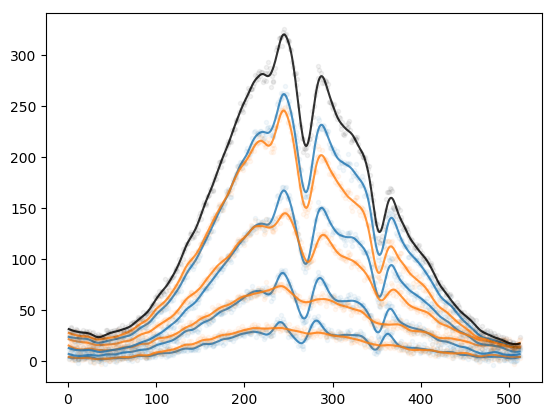

In [189]:
pidx = [3, 23, 4, 21, 5, 16, 6, 9, 7]
c = ["tab:blue", "tab:orange", 
    "tab:blue", "tab:orange",
    "tab:blue", "tab:orange",
    "tab:blue", "tab:orange", "k"]
ax = figure()
for (i, pi) in enumerate(pidx)
    p1 = plot(1:512, zz[:,pi], color=c[i], alpha=0.8, linestyle="-")
    p2 = plot(1:512, z[:,pi], color=c[i], ".", alpha=0.05)
end

In [134]:
c = plt1[1][:get_color]

PyObject <bound method Line2D.get_color of <matplotlib.lines.Line2D object at 0x132cfe240>>